In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
dataset_path = '/Users/melvinakash/Desktop/NCI/ric/final_eda_output.csv'

In [3]:
pd.set_option('display.max_columns',None)

data = pd.read_csv(dataset_path)

In [4]:
data.columns

Index(['a_ref', 'a_veh', 'a_cas', 'a_wkday', 'a_day', 'a_month', 'a_hour',
       'a_min', 'a_gd1', 'a_gd2', 'a_ctype', 'a_speed', 'c_class', 'c_sex',
       'c_agegroup', 'c_school', 'c_vtype', 'v_type', 'v_tow', 'v_man',
       'v_loc', 'v_impact', 'v_sex', 'v_agegroup', 'v_hitr', 'a_District_ANTN',
       'a_District_ARBC', 'a_District_ARND', 'a_District_BELC',
       'a_District_CCGL', 'a_District_DCST', 'a_District_FERO',
       'a_District_LISC', 'a_District_MEAN', 'a_District_MIDU',
       'a_District_NEMD', 'a_type'],
      dtype='object')

# Target variable distribution

In [5]:
data[['a_type']].value_counts()

a_type
3         34270
2          5826
1           622
dtype: int64

# Over Sampling using SMOTE

In [7]:
pd.set_option('display.max_columns', None)

# Extract features and target variable
X = data.drop('a_type', axis=1)  # Features
y = data['a_type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE only to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_synthetic, y_train_synthetic = smote.fit_resample(X_train, y_train)

# Combine the synthetic training data with the original training data
X_train_combined = pd.concat([X_train, X_train_synthetic])
y_train_combined = pd.concat([y_train, y_train_synthetic])



# Distribution after over sampling

In [8]:
y_train_combined.value_counts()

3    54888
2    32077
1    27941
Name: a_type, dtype: int64

# RandomForestClassifier()

In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score


# RandomForestClassifier
model = RandomForestClassifier()

# Defining the hyperparameters and their possible values for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_combined, y_train_combined)

# Getting the best hyperparameters
best_params = grid_search.best_params_

# Training the model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train_combined, y_train_combined)

# Making predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with the best hyperparameters: {accuracy:.4f}")

# Performing Randomized Search (alternative to Grid Search)
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, cv=5,
                                   scoring='accuracy', random_state=42)
random_search.fit(X_train_combined, y_train_combined)

# best hyperparameters from randomized search
best_params_random = random_search.best_params_

# Train the model with the best hyperparameters from randomized search
best_model_random = RandomForestClassifier(**best_params_random)
best_model_random.fit(X_train_combined, y_train_combined)

# Making predictions on the test set
y_pred_random = best_model_random.predict(X_test)

# Evaluating the model
accuracy_random = accuracy_score(y_test, y_pred_random)
report_random = classification_report(y_test, y_pred_random)



Accuracy with the best hyperparameters: 0.9849


In [23]:
print(f"Accuracy with the best hyperparameters: {accuracy:.4f}")
print(f"Classification Report for Random Forest with hyperparameter tuning:\n{report_random}")

Accuracy with the best hyperparameters: 0.9849
Classification Report for Random Forest with hyperparameter tuning:
              precision    recall  f1-score   support

           1       1.00      0.95      0.98       125
           2       0.98      0.92      0.95      1193
           3       0.98      1.00      0.99      6826

    accuracy                           0.98      8144
   macro avg       0.99      0.95      0.97      8144
weighted avg       0.98      0.98      0.98      8144



Confusion Matrix for RandomForestClassifier():



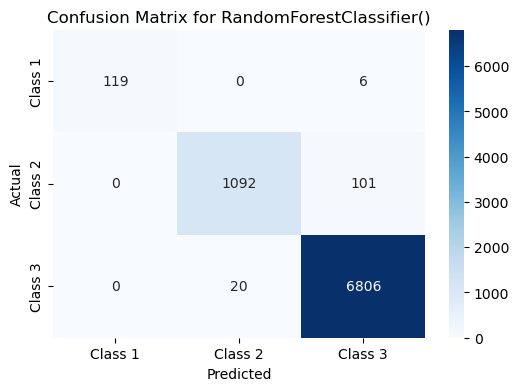

In [19]:
#Confusion Matrix for RandomForestClassifier():
confusion_mat = confusion_matrix(y_test, y_pred_random)
print(f"Confusion Matrix for RandomForestClassifier():\n")
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.title(f'Confusion Matrix for RandomForestClassifier()')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('=' * 40)

In [25]:
print(f"Best Hyperparameters for Decision Tree: {best_params}")

Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# DecisionTreeClassifier()

In [12]:
# Decision Tree
dt_model = DecisionTreeClassifier()

# Defining hyperparameters for Decision Tree
param_grid_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Performing Grid Search for Decision Tree
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_combined, y_train_combined)

# Getting the best hyperparameters for Decision Tree
best_params_dt = grid_search_dt.best_params_

# Training the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params_dt)
best_dt_model.fit(X_train_combined, y_train_combined)

# Making predictions on the test set using Decision Tree
y_pred_dt = best_dt_model.predict(X_test)

# Evaluating the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

#  Evaluating the model
print(f"Accuracy for Decision Tree with hyperparameter tuning: {accuracy_dt:.4f}")
print(f"Best Hyperparameters for Decision Tree: {best_params_dt}")
print(f"Classification Report for Decision Tree with hyperparameter tuning:\n{report_dt}")


Accuracy for Decision Tree with hyperparameter tuning: 0.9697
Best Hyperparameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report for Decision Tree with hyperparameter tuning:
              precision    recall  f1-score   support

           1       0.83      0.95      0.88       125
           2       0.89      0.93      0.91      1193
           3       0.99      0.98      0.98      6826

    accuracy                           0.97      8144
   macro avg       0.90      0.95      0.92      8144
weighted avg       0.97      0.97      0.97      8144



Confusion Matrix for DecisionTreeClassifier():



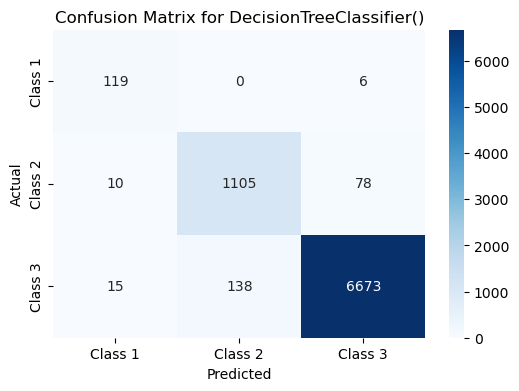

In [20]:
#Confusion Matrix for DecisionTreeClassifier():
confusion_mat = confusion_matrix(y_test, y_pred_dt)
print(f"Confusion Matrix for DecisionTreeClassifier():\n")
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.title(f'Confusion Matrix for DecisionTreeClassifier()')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('=' * 40)

# KNeighborsClassifier()

In [13]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()

# Defining hyperparameters for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Performing Grid Search for KNN
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_combined, y_train_combined)

# Get the best hyperparameters for KNN
best_params_knn = grid_search_knn.best_params_

# Training the KNN model with the best hyperparameters
best_knn_model = KNeighborsClassifier(**best_params_knn)
best_knn_model.fit(X_train_combined, y_train_combined)

# Making predictions on the test set using KNN
y_pred_knn = best_knn_model.predict(X_test)

# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

# Evaluating the model
print(f"Accuracy for K-Nearest Neighbors with hyperparameter tuning: {accuracy_knn:.4f}")
print(f"Best Hyperparameters for K-Nearest Neighbors: {best_params_knn}")
print(f"Classification Report for K-Nearest Neighbors with hyperparameter tuning:\n{report_knn}")


Accuracy for K-Nearest Neighbors with hyperparameter tuning: 0.9901
Best Hyperparameters for K-Nearest Neighbors: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Classification Report for K-Nearest Neighbors with hyperparameter tuning:
              precision    recall  f1-score   support

           1       0.94      0.99      0.96       125
           2       0.97      0.97      0.97      1193
           3       0.99      0.99      0.99      6826

    accuracy                           0.99      8144
   macro avg       0.97      0.98      0.98      8144
weighted avg       0.99      0.99      0.99      8144



Confusion Matrix for KNeighborsClassifier():



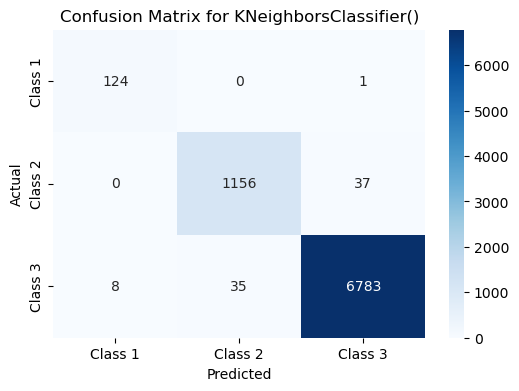

In [21]:
#Confusion Matrix for KNeighborsClassifier():
confusion_mat = confusion_matrix(y_test, y_pred_knn)
print(f"Confusion Matrix for KNeighborsClassifier():\n")
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.title(f'Confusion Matrix for KNeighborsClassifier()')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('=' * 40)

# MLPClassifier()

In [14]:
# Artificial Neural Network (ANN)
ann_model = MLPClassifier()

# Defining hyperparameters for ANN
param_grid_ann = {
    'hidden_layer_sizes': [(50, 25), (100, 50), (150, 75)],
    'alpha': [0.0001, 0.001, 0.01]
}

# Performing Grid Search for ANN
grid_search_ann = GridSearchCV(ann_model, param_grid_ann, cv=5, scoring='accuracy')
grid_search_ann.fit(X_train_combined, y_train_combined)

# Getting the best hyperparameters for ANN
best_params_ann = grid_search_ann.best_params_

# Train the ANN model with the best hyperparameters
best_ann_model = MLPClassifier(**best_params_ann)
best_ann_model.fit(X_train_combined, y_train_combined)

# Making predictions on the test set using ANN
y_pred_ann = best_ann_model.predict(X_test)

# Evaluating the ANN model
accuracy_ann = accuracy_score(y_test, y_pred_ann)
report_ann = classification_report(y_test, y_pred_ann)

# Evaluating the model
print(f"Accuracy for Artificial Neural Network with hyperparameter tuning: {accuracy_ann:.4f}")
print(f"Best Hyperparameters for Artificial Neural Network: {best_params_ann}")
print(f"Classification Report for Artificial Neural Network with hyperparameter tuning:\n{report_ann}")

Accuracy for Artificial Neural Network with hyperparameter tuning: 0.8382
Best Hyperparameters for Artificial Neural Network: {'alpha': 0.001, 'hidden_layer_sizes': (100, 50)}
Classification Report for Artificial Neural Network with hyperparameter tuning:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       125
           2       0.00      0.00      0.00      1193
           3       0.84      1.00      0.91      6826

    accuracy                           0.84      8144
   macro avg       0.28      0.33      0.30      8144
weighted avg       0.70      0.84      0.76      8144



/Users/melvinakash/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/melvinakash/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/melvinakash/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix for MLPClassifier()::



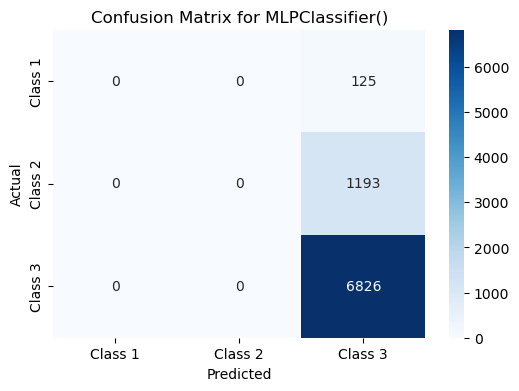

In [24]:
#Confusion Matrix for MLPClassifier():
confusion_mat = confusion_matrix(y_test, y_pred_ann)
print(f"Confusion Matrix for MLPClassifier()::\n")
# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.title(f'Confusion Matrix for MLPClassifier()')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('=' * 40)